# Birmingham Population

From various sources


In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm as colourmap
import json

plt.style.use('ggplot')

Data


In [9]:
populations = {
    "Wikipedia": 2919600,
    "Birmingham City Council": 1144900,
    "World Population Review": 2665100,
    "Office for National Statistics": 1144900,
    "PopulationData": 1141186,
    "CityPopulation": 1144919,
    "SimpleMaps.com": 2919600,
}

Plot


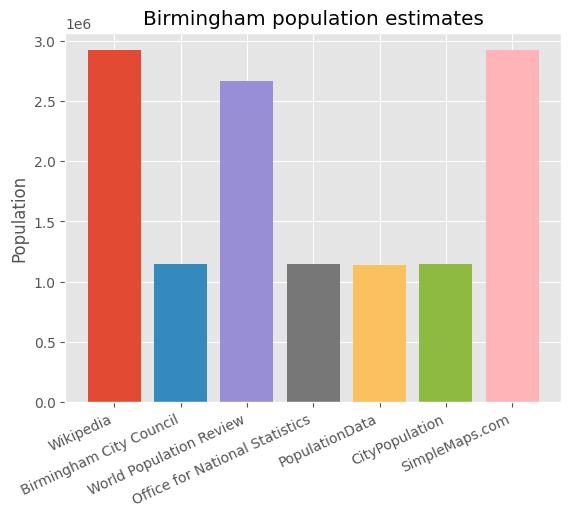

In [10]:
fig = plt.figure()
ax = fig.subplots()

for i, (source, population) in enumerate(populations.items()):
    ax.bar(source, population)

ax.set_ylabel("Population")
ax.set_title("Birmingham population estimates")
plt.xticks(rotation=25, ha="right")
plt.show()

fig.patch.set_facecolor('none')

fig.savefig("../images/bham_pop_comparison_websites.svg", dpi=300, bbox_inches="tight")

With ring populations


In [11]:
with open("./uk_rings/uk_rings.json", "r", encoding="utf-8") as f:
    rings = json.load(f)
bham_distances = rings["Birmingham"]["distances"]
bham_populations = rings["Birmingham"]["populations"]
bham_ring_populations = {
    distance: pop for distance, pop in zip(bham_distances, bham_populations)
}
populations["< 5km"] = bham_ring_populations[5]
populations["< 10km"] = bham_ring_populations[10]
populations["< 15km"] = bham_ring_populations[15]
populations["< 20km"] = bham_ring_populations[20]

Plot


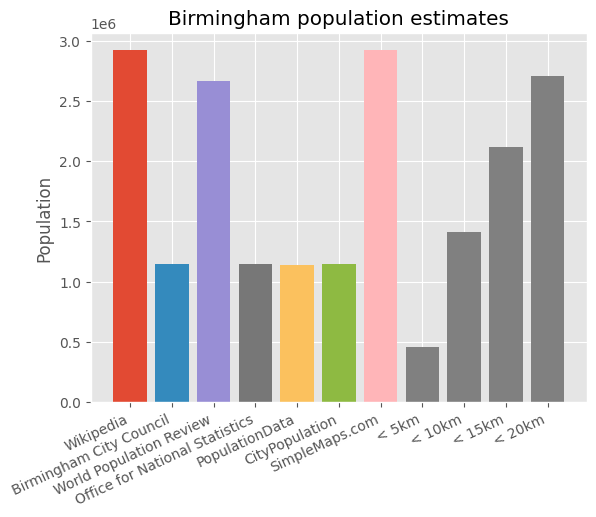

In [12]:
fig = plt.figure()
ax = fig.subplots()

for i, (source, population) in enumerate(populations.items()):
    color = None
    if "<" in source:
        color = "gray"
    ax.bar(source, population, color=color)

ax.set_ylabel("Population")
ax.set_title("Birmingham population estimates")
plt.xticks(rotation=25, ha="right")
plt.show()

fig.patch.set_facecolor('none')

fig.savefig("../images/bham_pop_comparison_websites_and_rings.svg", dpi=300, bbox_inches="tight")